
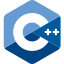
<br>

<div style="text-align:center; font-size:200%;">
 <b>SOLID: Open-Closed Prinzip</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 08 SOLID Open-Closed Prinzip.ipynb -->
<!-- slides/module_500_solid_grasp/topic_330_solid_ocp.cpp -->


# Open-Closed Prinzip (SOLID)

Klassen sollen

- Offen für Erweiterung
- Geschlossen für Modifikation

sein.

In [ ]:
enum class MovieKindV0
{
    Regular,
    Children,
};

In [ ]:
#include <iostream>

In [ ]:
class MovieV0
{
public:
    explicit MovieV0(std::string title, MovieKindV0 kind = MovieKindV0::Regular)
        : title_(std::move(title)), kind_(kind)
    {}

    std::string GetTitle() const { return title_; }
    MovieKindV0 GetKind() const { return kind_; }

    double ComputePrice() const
    {
        switch (kind_) {
        case MovieKindV0::Regular: return 4.99;
        case MovieKindV0::Children: return 5.99;
        default: return 0.0;
        }
    }

    void PrintInfo() const
    {
        std::cout << title_ << " costs " << ComputePrice() << std::endl;
    }

private:
    std::string title_;
    MovieKindV0 kind_;
};

In [ ]:
MovieV0 m1("Casablanca");
MovieV0 m2("Shrek", MovieKindV0::Children);

In [ ]:
m1.PrintInfo();
m2.PrintInfo();


<img src="img/movie_v0.svg" alt="MovieV0"
     style="display:block;margin:auto;width:50%"/>


Was passiert, wenn wir eine neue Filmart hinzufügen wollen?

In [ ]:
enum class MovieKind
{
    Regular,
    Children,
};

In [ ]:
class MovieV1
{
public:
    explicit MovieV1(std::string title, MovieKind kind = MovieKind::Regular)
        : title_(std::move(title)), kind_(kind)
    {}

    std::string GetTitle() const { return title_; }
    MovieKind GetKind() const { return kind_; }

    double ComputePrice() const
    {
        switch (kind_) {
        case MovieKind::Regular: return 4.99;
        case MovieKind::Children: return 5.99;
        default: return 0.0;
        }
    }

    void PrintInfo() const
    {
        std::cout << title_ << " costs " << ComputePrice() << std::endl;
    }

private:
    std::string title_;
    MovieKind kind_;
};

In [ ]:
MovieV1 m1("Casablanca");
MovieV1 m2("Shrek", MovieKind::Children);
// MovieV1 m3("Brand New", MovieKind::NewRelease);

In [ ]:
m1.PrintInfo();
m2.PrintInfo();
// m3.PrintInfo();


<img src="img/movie_v1.svg" alt="MovieV1"
     style="display:block;margin:auto;width:50%"/>


## OCP-Verletzung

- Neue Filmarten erfordern Änderungen an `MovieV1`
- `MovieV1` ist nicht geschlossen für Modifikation


## Auflösung (Versuch 1: Vererbung)

- Neue Filmarten werden als neue Klassen implementiert
- `MovieV2` wird abstrakt
- `MovieV2` ist geschlossen für Modifikation

In [ ]:
class MovieV2
{
public:
    explicit MovieV2(std::string title) : title_(std::move(title)) {}
    MovieV2(const MovieV2&) = delete;
    MovieV2& operator=(const MovieV2&) = delete;
    MovieV2(MovieV2&&) = delete;
    MovieV2& operator=(MovieV2&&) = delete;
    virtual ~MovieV2() = default;

    std::string GetTitle() const { return title_; }

    virtual double ComputePrice() const = 0;

    void PrintInfo() const
    {
        std::cout << title_ << " costs " << ComputePrice() << std::endl;
    }

private:
    std::string title_;
};

In [ ]:
class RegularMovie : public MovieV2
{
public:
    explicit RegularMovie(std::string title) : MovieV2(std::move(title)) {}

    double ComputePrice() const override { return 4.99; }
};

In [ ]:
class ChildrenMovie : public MovieV2
{
public:
    explicit ChildrenMovie(std::string title) : MovieV2(std::move(title)) {}

    double ComputePrice() const override { return 5.99; }
};

In [ ]:
class NewReleaseMovie : public MovieV2
{
public:
    explicit NewReleaseMovie(std::string title) : MovieV2(std::move(title)) {}

    double ComputePrice() const override { return 6.99; }
};

In [ ]:
RegularMovie m1("Casablanca");
ChildrenMovie m2("Shrek");
NewReleaseMovie m3("Brand New");

In [ ]:
m1.PrintInfo();
m2.PrintInfo();
m3.PrintInfo();

In [ ]:
const MovieV2* movie{&m1};
movie->PrintInfo();
movie = &m2;
movie->PrintInfo();
movie = &m3;
movie->PrintInfo();


<img src="img/movie_v2.svg" alt="MovieV0"
     style="display:block;margin:auto;width:100%"/>


- `MovieV2` ist offen für Erweiterung
- Neue Filmarten können hinzugefügt werden, ohne die bestehenden Klassen zu
  ändern
- Aber: Die Vererbungshierarchie umfasst die ganze Klasse
  - Nur eine Art von Variabilität
- Was ist, wenn wir für andere Zwecke eine andere Klassifikation brauchen?
  - Z.B. DVD, BluRay, Online?
- Mehrfachvererbung?
- Produkt von Klassen?
  - `ChildrenDVD`, `ChildrenBluRay`, `ChildrenOnline`, ...


## Bessere Auflösung: Strategy Pattern

- Das Strategy-Pattern erlaubt es uns, die Vererbung auf kleinere Teile der
  Klasse anzuwenden
- In fast allen Fällen ist das die bessere Lösung!
- Vererbung ist ein sehr mächtiges Werkzeug
- Aber je kleiner und lokaler wir unsere Vererbungshierarchien halten, desto
  besser


## Workshop: Smart Home Device Control System

In diesem Workshop arbeiten wir mit einem Szenario, das ein Smart Home
Gerätesteuerungssystem betrifft. Die Herausforderung? Das vorhandene System
verletzt das OCP, und es liegt an uns, das zu korrigieren.


### Szenario

Stellen Sie sich ein Smart-Home-System vor. Dieses System steuert verschiedene
Geräte: Lichter, Thermostate, Sicherheitskameras und intelligente Schlösser.
Jede Art von Gerät hat ihren eigenen einzigartigen Steuermechanismus und
Automatisierungsregeln.

Nun muss das Steuerungssystem des Smart Homes diese Geräte verwalten. Das
Problem mit dem aktuellen System ist die Verwendung eines Enums zur Bestimmung
des Gerätetyps und basierend darauf seiner Steuermethode. Dieser Ansatz ist
nicht skalierbar und verletzt das OCP. Was passiert, wenn ein neuer Typ von
Smart-Gerät zum Zuhause hinzugefügt wird? Oder was passiert, wenn sich der
Steuermechanismus für Thermostate ändert? Die aktuelle Code-Struktur erfordert
Änderungen an mehreren Stellen.

In [ ]:
#include <iostream>
#include <string>

In [ ]:
enum class DeviceType
{
    Light,
    Thermostat,
    SecurityCamera,
    SmartLock
};

In [ ]:
class DeviceV0
{
public:
    DeviceV0(DeviceType type) : type_(type) {}

    std::string Control()
    {
        switch (type_) {
        case DeviceType::Light: return "Turning light on/off.";
        case DeviceType::Thermostat: return "Adjusting temperature.";
        case DeviceType::SecurityCamera: return "Activating motion detection.";
        case DeviceType::SmartLock: return "Locking/Unlocking door.";
        default: return "Unknown device control!";
        }
    }

    std::string GetStatus() const
    {
        switch (type_) {
        case DeviceType::Light: return "Light is on/off.";
        case DeviceType::Thermostat: return "Current temperature: 22°C.";
        case DeviceType::SecurityCamera: return "Camera is active/inactive.";
        case DeviceType::SmartLock: return "Door is locked/unlocked.";
        default: return "Unknown device status!";
        }
    }

private:
    DeviceType type_;
};

In [ ]:
std::vector<DeviceV0> devicesOriginal = {
    DeviceV0{DeviceType::Light}, DeviceV0{DeviceType::Thermostat}, DeviceV0{DeviceType::SecurityCamera}};

In [ ]:
void ManageDevices(std::vector<DeviceV0>& devices)
{
    for (DeviceV0& device : devices) {
        std::cout << device.Control() << " " << device.GetStatus() << "\n";
    }
}

In [ ]:
ManageDevices(devicesOriginal);


- Beseitigen Sie das Problem mit der OCP-Verletzung im vorhandenen Code
- Sie können entweder den vorhandenen Code ändern oder eine neue Lösung von
  Grund auf neu erstellen